## <h1><center>Course: Introduction to Machine Learning</center></h1>
## <h1><center>Assigment 3</center></h1>
### <h1><center>Important NOTE: In order to get full credit, for every question, you need to provide the details of your work on how to get to a solution or the end of a proof.</center></h1>
#### <h1><center>Instructor: Tan Bui-Thanh</center></h1>
#### <h1><center>TA: Cole Nockolds</center></h1>
##### <h1><center>Due day: 11:00 pm, Tuesday, 15 October </center></h1>
#### <h1><center>All submission MUST be in pdf format, except codes. All code outputs should be reported in pdf format.</center></h1>

## **Question 1** (Monte Carlo Approximation) (20 points)

In this question, you will estimate pi using Monte-Carlo approximation by two different methods:

1. Method 1: Write a Python program to estimate $\pi$ using Monte-Carlo approximation. Report the number of samples, N (the number of pairs $(x^{(i)}, y^{(i)})$) that allows you to obtain 2 decimal places of accuracy for $\pi$ (that means your result is in the interval $(3.135, 3.145)$). Hint: Drawing samples $(x^{(i)}$, $y^{(i)})$ independently from a uniform distribution $\mathcal{U}[0,1]$, the probability that a point lies inside the circle of radius of 1 is $\pi/4$.
2. Method 2: Notice that using elementary calculus the area of the first quarter of or a disk of radius $1$ can also be computed as
$$\frac{\pi}{4} = \int_0^1 \sqrt{1-x^2} dx = \mathbb{E}_{X \sim U [0, 1]}[\sqrt{1-X^2}].$$
Describe how you are going to use the Monte-Carlo method to estimate $\pi/4$ in this case. Write a Python code to estimate $\pi$. Report the number of samples, N, that allow you to obtain 2 decimal places of accuracy for $\pi$.


Comparing the two methods, which approach converges to the requested tolerance with smaller $N$? Explain your answer. Hint: we need to run the experiment for a few hundred individual random seeds. For each random seed, draw 10000 samples. Next, compute the expectation, or the average estimated $\pi$, over all random seeds. Report the variance of each method. 

In [291]:
# 1.1
import numpy as np
pi = 3.14
def estimate_pi_method_1(N):
    x = np.random.uniform(0, 1, N)
    y = np.random.uniform(0, 1, N)
    inside_circle = (x**2 + y**2) <= 1
    pi_estimate = 4 * np.mean(inside_circle)
    return pi_estimate

# Run experiment to find N that gives two decimal places accuracy
def find_N_for_accuracy_method_1(tol=0.005, max_N=1000000):
    N = 100
    while N < max_N:
        pi_estimate = estimate_pi_method_1(N)
        if pi-tol <= pi_estimate <= pi+tol:
            return N, pi_estimate
        N +=1
    return None, None

# Finding N for two decimal places accuracy
N1, pi_estimate1 = find_N_for_accuracy_method_1()
print(f"Method 1: Required samples N = {N1}, Estimated pi = {pi_estimate1}")



Method 1: Required samples N = 126, Estimated pi = 3.142857142857143


In [292]:
#1.2
def estimate_pi_method_2(N):
    x = np.random.uniform(0, 1, N)
    pi_estimate = 4 * np.mean(np.sqrt(1 - x**2))
    return pi_estimate

# Run experiment to find N that gives two decimal places accuracy
def find_N_for_accuracy_method_2(tol=0.005, max_N=1000000):
    N = 100
    while N < max_N:
        pi_estimate = estimate_pi_method_2(N)
        if pi-tol <= pi_estimate <= pi+tol:
            return N, pi_estimate
        N +=1
    return None, None

# Finding N for two decimal places accuracy
N2, pi_estimate2 = find_N_for_accuracy_method_2()
print(f"Method 2: Required samples N = {N2}, Estimated pi = {pi_estimate2}")


Method 2: Required samples N = 116, Estimated pi = 3.1411241642234415


In [293]:
# 1.3: comparision
def compare_methods(num_trials=100, N=10000):
    method_1_estimates = []
    method_2_estimates = []

    for _ in range(num_trials):
        method_1_estimates.append(estimate_pi_method_1(N))
        method_2_estimates.append(estimate_pi_method_2(N))

    # Calculate mean and variance of both methods
    method_1_mean = np.mean(method_1_estimates)
    method_1_variance = np.var(method_1_estimates)
    method_2_mean = np.mean(method_2_estimates)
    method_2_variance = np.var(method_2_estimates)

    print(f"Method 1: Mean estimate = {method_1_mean}, Variance = {method_1_variance}")
    print(f"Method 2: Mean estimate = {method_2_mean}, Variance = {method_2_variance}")

# Compare both methods
compare_methods()


Method 1: Mean estimate = 3.1414439999999995, Variance = 0.0002508828640000007
Method 2: Mean estimate = 3.1423185007893597, Variance = 7.305424497886844e-05


## **Question 2** (Probabilistic Regression) (30 points)

Consider a function $$y = f(x) = a_4x^4 + a_3x^3 + a_2x^2 + a_1x + a_0$$ $$[a_0,a_1,a_2, a_3, a_4] = [0.5, -1.0, -0.5, -2.0, 5.0]$$ 
First, generate N noisy data samples by the following process. 

1. Select N and $\delta$ (These are entirely your choice).
2. Draw N Gaussian distributed samples $x^{(i)} \sim \mathcal{N}(0, 2)$.
3. Generate noisy y data by the formula $y^{(i)} = f(x^{(i)}) + \epsilon$, where $\epsilon \sim \mathcal{N}(0, \delta^2)$.


(i) Use the Gaussian likelihood model with polynomial regression of order $10$ for the conditional distribution of $y$ given $x$ and $\boldsymbol{\theta}$ 
$$P(y |x, \boldsymbol{\theta}).$$ 
Here, use $\sigma = \delta$. From the N samples of $(x^{(i)}, y^{(i)}), i =1,...,N$, find the optimal $\boldsymbol{\theta}^*$ by the maximum conditional likelihood function approach. Do this by, first, deriving the correct optimization problem, then solving the problem using python.

(ii) Determine the mean of conditional distribution $P( y | x, \boldsymbol{\theta}^*)$ as a function of x. Plot this mean together with the training data.

(iii) Find (analytically) the variance of conditional distribution $$P( y |x, \boldsymbol{\theta}^*).$$ Plot the curves for ($y \pm \sigma$) on top of your figure from (ii).

(iv) Now, draw $x^{(i)} \sim \mathcal{N}(0, 2)$, for $i=1,...,50$, and then compute $y^{(i)} = f(x^{(i)}) + \epsilon$. Plot these 50 pairs $(x^{(i)}, y^{(i)})$ in the same figure from (iii). What is the percentage of points that are within the uncertainty band? Discuss the result.

(v) From the N samples, $(x^{(i)}, y^{(i)})$, find the optimal $\boldsymbol{\theta}^*$ by optimizing the model using the MAP approach (see Lecture 5b to help you derive the MAP function). The variance for the prior Gaussian distribution of $\boldsymbol{\theta}$ should be a reasonable value as it has the same meaning as a regularization parameter as discussed and derived in class.

(vi) Repeat items (ii), (iii), and (iv) for the MAP approach. Discuss the difference in your results between the two approaches. 

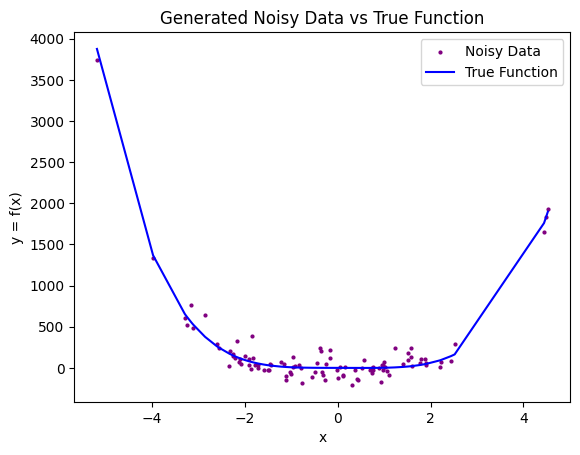

In [294]:
# 2 - pre-processing
import numpy as np
import matplotlib.pyplot as plt
# Given coefficients for the polynomial function
coeffs = [0.5, -1.0, -0.5, -2.0, 5.0]  # [a0, a1, a2, a3, a4]
N = 100  # Number of samples
delta = 10 # Noise level

# Step 1: Generate x samples from N(0, 2)
x_samples = np.random.normal(0, 2, N)

# Step 2: Generate noisy y data
def f(x, coeffs):
    return coeffs[4] * x**4 + coeffs[3] * x**3 + coeffs[2] * x**2 + coeffs[1] * x + coeffs[0]

y_clean = f(x_samples, coeffs)
noise = np.random.normal(0, delta**2, N)
y_samples = y_clean + noise

# Plot the generated noisy data


plt.scatter(x_samples, y_samples, label="Noisy Data", color="purple", s = 4)
plt.plot(np.sort(x_samples), f(np.sort(x_samples), coeffs), label="True Function", color="blue")
plt.legend()
plt.xlabel("x")
plt.ylabel("y = f(x)")
# plt.gca().invert_yaxis()
plt.title("Generated Noisy Data vs True Function")
plt.show()


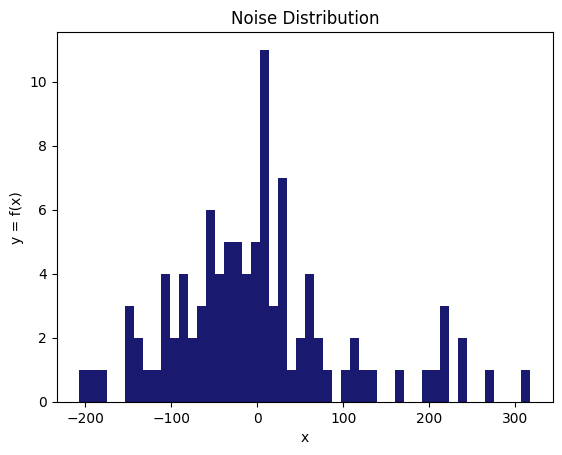

In [295]:
# 2 - preprocessing, viewing gaussian distribution

plt.hist(y_samples-y_clean,bins = 50, color = "midnightblue")
plt.xlabel("x")
plt.ylabel("y = f(x)")
plt.title("Noise Distribution")
plt.show()


Optimal coefficients (theta): [-1.79086824e+01 -2.40367096e+01  5.48051892e+00  3.32058507e+01
  1.43842999e+01 -8.44492798e+00 -2.47746768e+00  5.52702544e-01
  1.62652645e-01 -1.07957353e-02 -3.15503666e-03]


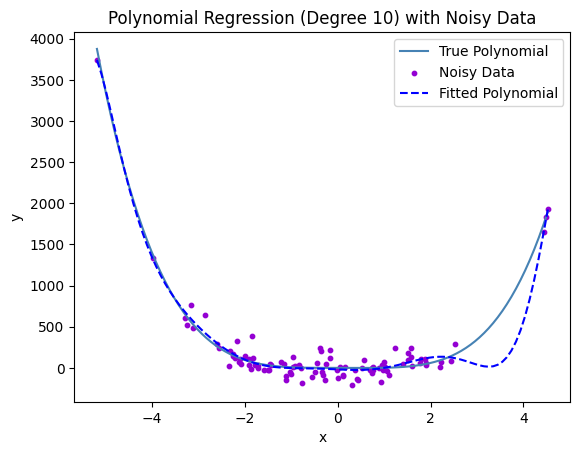

In [296]:
#1.i), part 2 (python implementation)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# Polynomial regression of degree 10
degree=10
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(x_samples.reshape(-1, 1))  # create polynomial features

# Fit the model using Linear Regression (solves the least squares problem)
model = LinearRegression(fit_intercept=False)
model.fit(X_poly, y_samples)

# Get the optimal coefficients (theta)
theta_optimal = model.coef_
print("Optimal coefficients (theta):", theta_optimal)

# Plot the true polynomial and the fitted polynomial
x_plot = np.linspace(min(x_samples), max(x_samples), 100)
y_plot_true = f(x_plot, coeffs)
y_plot_fitted = model.predict(poly.transform(x_plot.reshape(-1, 1)))

plt.plot(x_plot, y_plot_true, label="True Polynomial", color='steelblue')
plt.scatter(x_samples, y_samples, label="Noisy Data", color='darkviolet', s=10)
plt.plot(x_plot, y_plot_fitted, label="Fitted Polynomial", color='blue', linestyle='--')
plt.legend()
plt.title("Polynomial Regression (Degree 10) with Noisy Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [297]:
# 2. ii) - mean
X_poly = poly.fit_transform(x_samples.reshape(-1, 1))

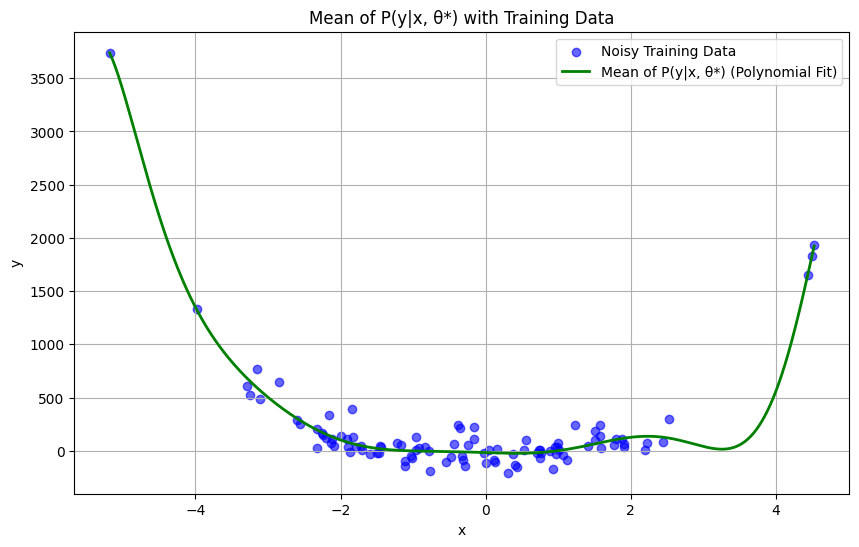

In [298]:
# 2.ii) - mean of P(y|x, θ*)
# Step 3: Calculate the mean of P(y|x, θ*) which is the fitted polynomial, theta.T X
x_vals = np.linspace(min(x_samples), max(x_samples), 500)  # points for plotting the polynomial
y_pred = np.polyval(theta_optimal, x_vals)  # mean of conditional distribution
y_act_pred = poly.fit_transform(x_vals.reshape(-1, 1)) @ theta_optimal.T 

# Step 4: Plot the training data and the mean of P(y|x, θ*)
plt.figure(figsize=(10, 6))
plt.scatter(x_samples, y_samples, color='blue', label='Noisy Training Data', alpha=0.6)
# plt.plot(x_vals, y_pred, color='red', label='Mean of P(y|x, θ*) (Polynomial Fit)', linewidth=2)
plt.plot(x_vals, y_act_pred, color='green', label='Mean of P(y|x, θ*) (Polynomial Fit)', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Mean of P(y|x, θ*) with Training Data')
plt.legend()
plt.grid(True)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


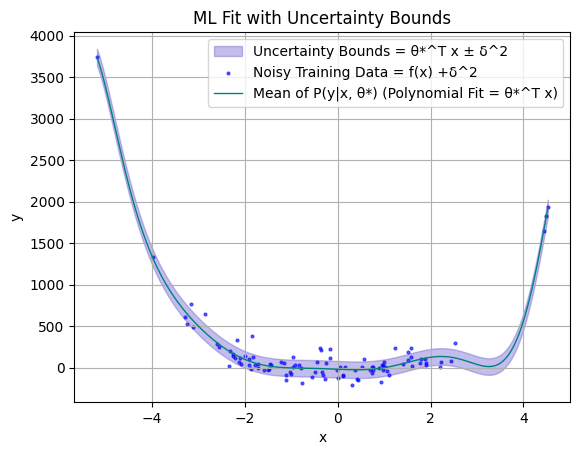

In [299]:
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Plot the mean and uncertainty bounds
y_upper = y_act_pred + delta**2
y_lower = y_act_pred - delta**2

plt.fill_between(x_vals, y_lower, y_upper, color="slateblue", alpha=0.4, label="Uncertainty Bounds = θ*^T x ± δ^2")
plt.scatter(x_samples, y_samples, color='blue', label='Noisy Training Data = f(x) +δ^2', alpha=0.6, s = 4)
plt.plot(x_vals, y_act_pred, color='teal', label='Mean of P(y|x, θ*) (Polynomial Fit = θ*^T x)', linewidth=1)
plt.legend()
plt.title("ML Fit with Uncertainty Bounds")
plt.show()


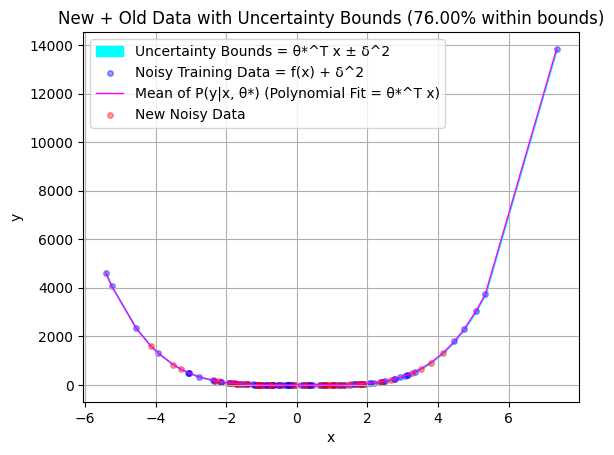

In [308]:
# Generate new 50 noisy data points
N_new = 50
x_new = np.random.normal(0, 2, N_new)
y_new = f(x_new, coeffs) + np.random.normal(0, delta, N_new) # delta squared?


# Calculate the percentage of points within the uncertainty bounds
y_new_pred = np.polyval(theta_optimal, x_new)
within_bounds = np.sum((y_new > (y_new_pred - delta)) & (y_new < (y_new_pred + delta)))
percentage_within_bounds = within_bounds / N_new * 100

# Prepare for plotting
all_x = np.sort(np.hstack((x_samples, x_new))).reshape(-1, 1)
y_act_pred = np.polyval(theta_optimal, all_x)
y_act_pred = y_act_pred.reshape(y_act_pred.shape[0])

# Uncertainty bounds
y_upper = y_act_pred + delta**2
y_lower = y_act_pred - delta**2

# Plot the data, fit, and uncertainty bounds
plt.fill_between(all_x.reshape(all_x.shape[0]), y_lower.reshape(y_lower.shape[0]), y_upper.reshape(y_upper.shape[0]), color="cyan", alpha=0.99, label="Uncertainty Bounds = θ*^T x ± δ^2")
plt.scatter(x_samples, y_samples, color='blue', label='Noisy Training Data = f(x) + δ^2', alpha=0.4, s=16)
plt.plot(all_x.reshape(all_x.shape[0]), y_act_pred, color='magenta', label='Mean of P(y|x, θ*) (Polynomial Fit = θ*^T x)', linewidth=1)

# Plot the new data points
plt.scatter(x_new, y_new, label="New Noisy Data", color="red", alpha=0.4, s=16)

# Title and labels
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title(f"New + Old Data with Uncertainty Bounds ({percentage_within_bounds:.2f}% within bounds)")

# Display the plot
plt.show()


Norm diff of True Function and Ridge Prediction: 840.0625362697665


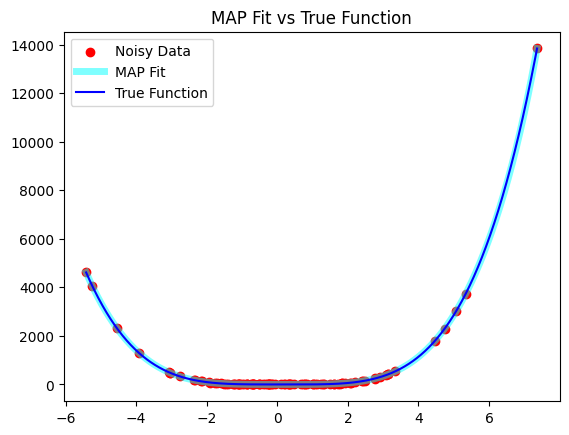

In [328]:
# 2.5    
from sklearn.linear_model import Ridge

# Use Ridge regression for MAP estimation
p_lambda = 10 # regularization/ standard deviation for P(theta)
ridge_reg = Ridge(alpha=p_lambda**2)  # Use delta as the regularization parameter
ridge_reg.fit(np.vander(x_samples, 10 + 1), y_samples)
theta_map = ridge_reg.coef_
# Generate predictions for MAP
x_plot = np.linspace(np.min(x_samples), np.max(x_samples), 1000)
y_map_pred = np.polyval(theta_map, x_plot)

# Plot the MAP fit
plt.scatter(x_samples, y_samples, label="Noisy Data", color="red")
plt.plot(x_plot, y_map_pred, label="MAP Fit", color="cyan", linewidth = 5, alpha = .5)
plt.plot(x_plot, f(x_plot, coeffs), label="True Function", color="blue")
print("Norm diff of True Function and Ridge Prediction:", np.linalg.norm(f(x_plot, coeffs)- y_map_pred))
plt.legend()
plt.title("MAP Fit vs True Function")
plt.show()


In [331]:
#2.5 - 2 : Mean of Conditional with MAP
from sklearn.linear_model import Ridge
import numpy as np
import matplotlib.pyplot as plt

# Fit polynomial of degree 10 using Ridge regression (MAP approach)
poly_order = 10
X_design = np.vander(x_samples, poly_order + 1)  # Vandermonde matrix for polynomial terms

# Regularization parameter (lamda = delta^2)
lamda  = 10
lambda_param = lamda**2
ridge_reg = Ridge(alpha=lambda_param)
ridge_reg.fit(X_design, y_samples)

# MAP estimate of theta
theta_map = ridge_reg.coef_

# Generate the mean of the conditional distribution for a range of x values
X_vander = np.vander(x_plot, poly_order + 1)
y_mean_map = X_vander.dot(theta_map)

# Plot the MAP mean with training data
plt.scatter(x_samples, y_samples, color='blue', label='Training Data', alpha=0.6)
plt.plot(x_vals, y_mean_map, color='green', label='MAP Mean', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('MAP Mean for Polynomial Regression (Degree 10)')
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [1000, 100]

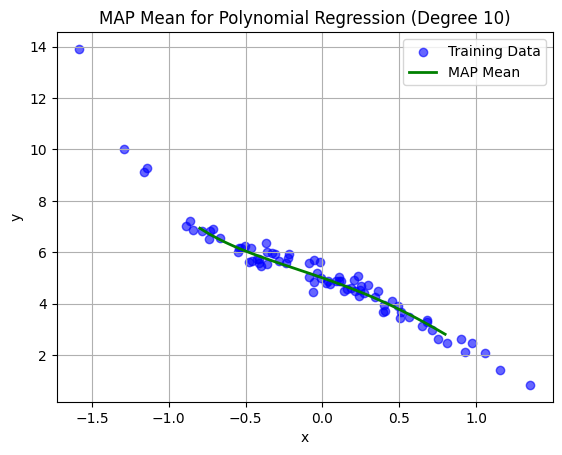

In [359]:
import numpy as np
import matplotlib.pyplot as plt
x_samples = np.random.normal(0, .5, N)

# Step 2: Generate noisy y data
def f(x, coeffs):
    return coeffs[4] * x**4 + coeffs[3] * x**3 + coeffs[2] * x**2 + coeffs[1] * x + coeffs[0]

y_clean = f(x_samples, coeffs)
noise = np.random.normal(0, delta**2, N)
y_samples = y_clean + noise
# Use Ridge regression for MAP estimation
p_lambda = 10 # regularization/ standard deviation for P(theta)
ridge_reg = Ridge(alpha=p_lambda**2)  # Use delta as the regularization parameter
ridge_reg.fit(np.vander(x_samples, 10 + 1), y_samples)
theta_map = ridge_reg.coef_
# Generate predictions for MAP
x_plot = np.linspace(np.min(x_samples), np.max(x_samples), 1000)
y_map_pred = np.polyval(theta_map, x_plot)


# Regularization parameter (related to sigma_theta^2)
sigma_theta = 1.0
delta = 0.5
lambda_param = delta**2

# Design matrix (Vandermonde matrix for polynomial features)
poly_order = 10
X_design = np.vander(x_samples, poly_order + 1)

# Compute MAP estimate for theta
lambda_identity = lambda_param * np.eye(X_design.shape[1])
theta_map = np.linalg.inv(X_design.T @ X_design + lambda_identity) @ X_design.T @ y_samples

# Mean of the conditional distribution
x_vals = np.linspace(-1, 1, 100)
X_vander = np.vander(x_vals, poly_order + 1)
y_mean_map = X_vander @ theta_map

# Plot results
plt.scatter(x_samples[10:-10], y_samples[10:-10], color='blue', label='Training Data', alpha=0.6)
plt.plot(x_vals[10:-10], y_mean_map[10:-10], color='green', label='MAP Mean', linewidth=2)
# plt.plot(x_plot[10:-10], f(x_plot, coeffs)[10:-10], label="True Function", color="blue")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('MAP Mean for Polynomial Regression (Degree 10)')
plt.show()


## **Question 3** (Logistic Regression) (30 points)

In this problem, you will use regression to classify two types of iris flowers (Iris Versicolour, Iris Virginica) based on 4 features (petal length, petal width, sepal length, sepal width). Recall that for linear regression our model class is given as $$z = \boldsymbol{\theta}^T \boldsymbol{x}$$ where $\boldsymbol{\theta} = [\theta_0, ..., \theta_n]^T$, and $\boldsymbol{x} = [1, x_1, ..., x_n]^T$ with $n$ being the number of input features.
We define the probability of model class $y$, given features $\boldsymbol{x}$, as $$P(y|\boldsymbol{x}, \boldsymbol{\theta}) = \frac{1}{1 + e^{-z}}.$$ For logistic regression, we need to define a loss function to accommodate the nature of the classification problem. Cross entropy loss (derived in class) is a good choice, which is given as $$\mathcal{L}(\boldsymbol{\theta}) = - \frac{1}{N} \sum_{i=1}^{N} y^{(i)} \, \log(P(y^{(i)}|\boldsymbol{x}^{(i)}, \boldsymbol{\theta})) + (1 - y^{(i)}) \, \log(1 - P(y^{(i)}|\boldsymbol{x}^{(i)}, \boldsymbol{\theta}))$$ where $y^{(i)}$ is the label of i-th flower. The label y = 0 corresponds to Iris Versicolour and $y = 1$ corresponds to Iris Virginica. $N$ is the number of training samples. For this problem, N = 80, and the holdout dataset contains 20 samples. The logarithm function has base $e$.

1. Derive the gradient expression of the loss function for logistic regression.

2. Perform logistic regression using the gradient descent code that you wrote in the first homework. You have to decide the initial guess for $\boldsymbol{\theta}$. Plot your classifications on the testing data, circling the wrong prediction points, and report the percentage of misclassifications. See lecture 1 for diabetes risk as an example.

3. Perform logistic regression with L2 regularization using the gradient descent codes that you wrote in the first homework. Choose a reasonable regularization parameter. Plot your classfications on the testing data, circling the wrong prediction points. Report the percentage of misclassifications.

4. Using the scikit-learn LogisticRegression function, perform logistic regression on the data. Compare the results with your result from part 2.

5. Using the scikit-learn LogisticRegression function, perform logistic regression with L2 regularization on the data. Compare the results with your result from part 3.

6. If you acheived different classification results in part 2 and 3, explain the reason why this is the case.

Note: It is fine if you get no misclassifications for the holdout data.

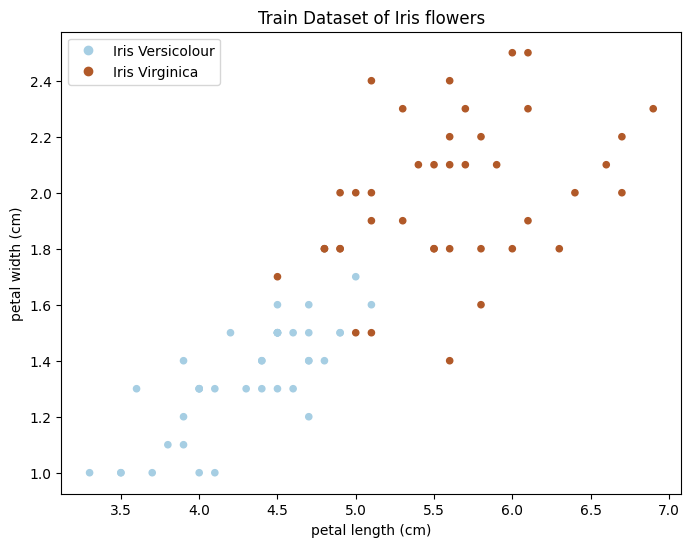

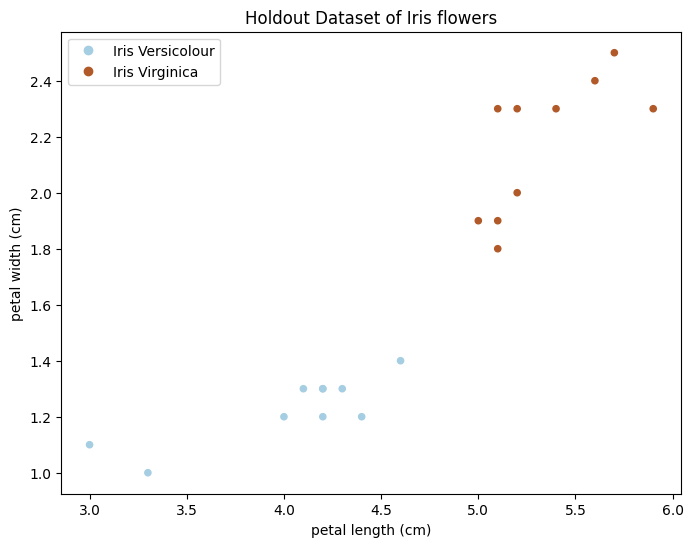

In [338]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

# Load and visualize the Iris flower dataset
iris = datasets.load_iris()
iris.target[50:100] = 0
iris.target[100:150] = 1
X = np.concatenate((iris.data[50:90], iris.data[100:140]), axis = 0)
y = np.concatenate((iris.target[50:90], iris.target[100:140]), axis = 0)

X_holdout = np.concatenate((iris.data[90:100], iris.data[140:150]), axis = 0)
y_holdout = np.concatenate((iris.target[90:100], iris.target[140:150]), axis = 0)

#print(X_holdout.shape, y_holdout.shape)

# # Visualize data
plt.figure(figsize=(8,6))
p1 = plt.scatter(X[:,2], X[:,3], alpha=1, c=y, cmap='Paired', s=20)
plt.ylabel("petal width (cm)")
plt.xlabel("petal length (cm)")
plt.title("Train Dataset of Iris flowers")
plt.legend(handles=p1.legend_elements()[0], labels=['Iris Versicolour', 'Iris Virginica'])
plt.show()

# Visualize data
plt.figure(figsize=(8,6))
p1 = plt.scatter(X_holdout[:,2], X_holdout[:,3], alpha=1, c=y_holdout, cmap='Paired', s=20)
plt.ylabel("petal width (cm)")
plt.xlabel("petal length (cm)")
plt.title("Holdout Dataset of Iris flowers")
plt.legend(handles=p1.legend_elements()[0], labels=['Iris Versicolour', 'Iris Virginica'])

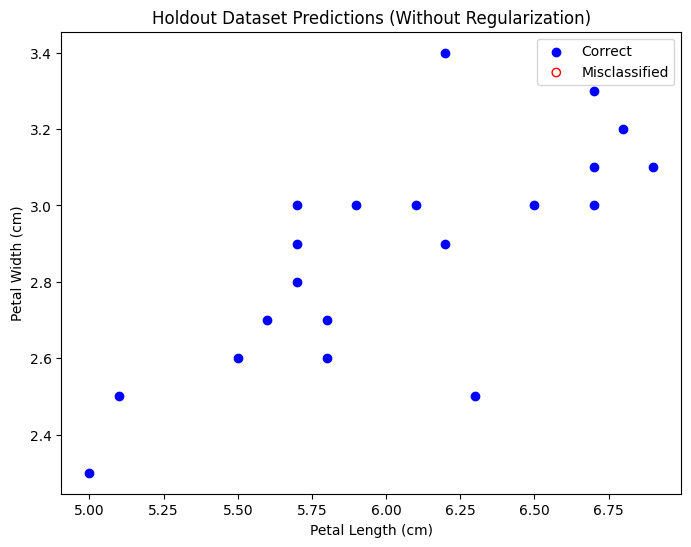

Percentage of misclassifications: 0.00%


In [339]:

# Add intercept term
X = np.hstack((np.ones((X.shape[0], 1)), X))
X_holdout = np.hstack((np.ones((X_holdout.shape[0], 1)), X_holdout))

# Gradient Descent Implementation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    return - (1/m) * (y @ np.log(h) + (1 - y) @ np.log(1 - h))

def gradient_descent(X, y, theta, learning_rate=0.01, epochs=1000):
    m = len(y)
    loss_history = []

    for _ in range(epochs):
        h = sigmoid(X @ theta)
        gradient = (1/m) * (X.T @ (h - y))
        theta -= learning_rate * gradient
        loss_history.append(compute_loss(X, y, theta))
    
    return theta, loss_history

# Initial guess for theta
theta_initial = np.zeros(X.shape[1])
theta_final, _ = gradient_descent(X, y, theta_initial)

# Make predictions
predictions = sigmoid(X_holdout @ theta_final) >= 0.5
misclassifications = predictions != y_holdout
percentage_misclassified = np.mean(misclassifications) * 100

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_holdout[~misclassifications][:, 1], X_holdout[~misclassifications][:, 2], c='blue', label='Correct')
plt.scatter(X_holdout[misclassifications][:, 1], X_holdout[misclassifications][:, 2], facecolors='none', edgecolors='red', label='Misclassified')
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Holdout Dataset Predictions (Without Regularization)")
plt.legend()
plt.show()

print(f"Percentage of misclassifications: {percentage_misclassified:.2f}%")

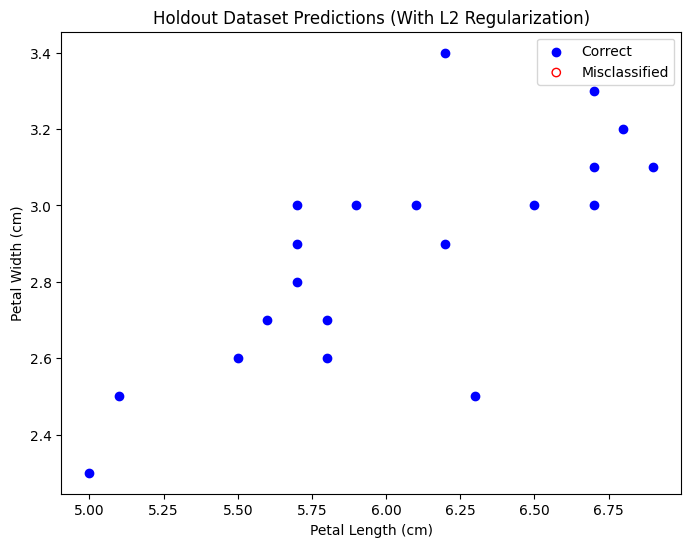

Percentage of misclassifications with L2 regularization: 0.00%


In [340]:
def compute_loss_with_regularization(X, y, theta, lambda_reg):
    m = len(y)
    h = sigmoid(X @ theta)
    loss = - (1/m) * (y @ np.log(h) + (1 - y) @ np.log(1 - h))
    reg_term = (lambda_reg / (2 * m)) * np.sum(np.square(theta[1:]))
    return loss + reg_term

def gradient_descent_with_regularization(X, y, theta, learning_rate=0.01, epochs=1000, lambda_reg=1.0):
    m = len(y)
    loss_history = []

    for _ in range(epochs):
        h = sigmoid(X @ theta)
        gradient = (1/m) * (X.T @ (h - y)) + (lambda_reg/m) * np.hstack(([0], theta[1:]))
        theta -= learning_rate * gradient
        loss_history.append(compute_loss_with_regularization(X, y, theta, lambda_reg))
    
    return theta, loss_history

# Initial guess for theta
lambda_reg = 1.0  # Regularization parameter
theta_final_reg, _ = gradient_descent_with_regularization(X, y, theta_initial, lambda_reg=lambda_reg)

# Make predictions
predictions_reg = sigmoid(X_holdout @ theta_final_reg) >= 0.5
misclassifications_reg = predictions_reg != y_holdout
percentage_misclassified_reg = np.mean(misclassifications_reg) * 100

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_holdout[~misclassifications_reg][:, 1], X_holdout[~misclassifications_reg][:, 2], c='blue', label='Correct')
plt.scatter(X_holdout[misclassifications_reg][:, 1], X_holdout[misclassifications_reg][:, 2], facecolors='none', edgecolors='red', label='Misclassified')
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Holdout Dataset Predictions (With L2 Regularization)")
plt.legend()
plt.show()

print(f"Percentage of misclassifications with L2 regularization: {percentage_misclassified_reg:.2f}%")


In [343]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression without regularization
model = LogisticRegression(solver='lbfgs', max_iter=1000, penalty='none')
model.fit(X[:, 1:], y, None)  # Exclude the intercept term

# Predictions and misclassifications
sklearn_predictions = model.predict(X_holdout[:, 1:])
sklearn_misclassifications = sklearn_predictions != y_holdout
sklearn_percentage_misclassified = np.mean(sklearn_misclassifications) * 100

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_holdout[~sklearn_misclassifications][:, 1], X_holdout[~sklearn_misclassifications][:, 2], c='blue', label='Correct')
plt.scatter(X_holdout[sklearn_misclassifications][:, 1], X_holdout[sklearn_misclassifications][:, 2], facecolors='none', edgecolors='red', label='Misclassified')
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Holdout Dataset Predictions (Scikit-learn)")
plt.legend()
plt.show()

print(f"Percentage of misclassifications using scikit-learn: {sklearn_percentage_misclassified:.2f}%")


InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'l1', 'l2', 'elasticnet'} or None. Got 'none' instead.

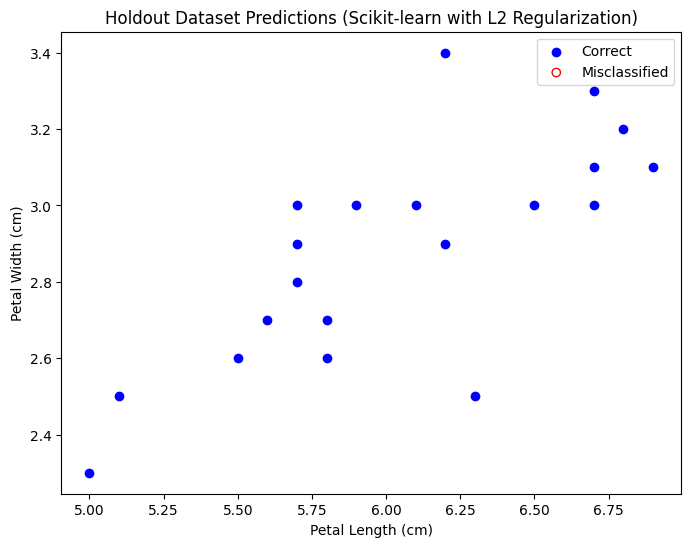

Percentage of misclassifications using scikit-learn with L2 regularization: 0.00%


In [344]:
# Logistic Regression with L2 regularization
model_reg = LogisticRegression(solver='lbfgs', max_iter=1000, penalty='l2', C=1.0)  # C is the inverse of regularization strength
model_reg.fit(X[:, 1:], y)  # Exclude the intercept term

# Predictions and misclassifications
sklearn_predictions_reg = model_reg.predict(X_holdout[:, 1:])
sklearn_misclassifications_reg = sklearn_predictions_reg != y_holdout
sklearn_percentage_misclassified_reg = np.mean(sklearn_misclassifications_reg) * 100

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_holdout[~sklearn_misclassifications_reg][:, 1], X_holdout[~sklearn_misclassifications_reg][:, 2], c='blue', label='Correct')
plt.scatter(X_holdout[sklearn_misclassifications_reg][:, 1], X_holdout[sklearn_misclassifications_reg][:, 2], facecolors='none', edgecolors='red', label='Misclassified')
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Holdout Dataset Predictions (Scikit-learn with L2 Regularization)")
plt.legend()
plt.show()

print(f"Percentage of misclassifications using scikit-learn with L2 regularization: {sklearn_percentage_misclassified_reg:.2f}%")


## **Question 4** (Generative vs Discriminative Models) (20 points)

This question uses the Iris flower dataset. Specifically, you will use three features sepal length (cm), sepal width (cm), petal length (cm) to classify types of flowers in a generative model.

1. Compute the empirical means and covariance matrices for each type of flower.

2. Generate new flowers, denoted as set $S$, from the learned probability and plot these flowers in 3D, where each axis is one of the three features, sepal length, sepal width, petal length. Observe and discuss your results.

3. Using the set $S$ as test data, classify the test data using the generative model that you have found in part 1. Discuss your results.

4. Again, using the set $S$ as test data, use logistic regression to train a classification model, then verify the learned model with test data $S$. Compare your results with part 3.

In [12]:
# 3.2

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def compute_loss(X, y, theta):
    m = len(y)
    # predictions = sigmoid(np.dot(X, theta))
    predictions  = sigmoid(np.einsum("nd,d -> n", X, theta))
    print(np.einsum("nd,d -> d", X, theta))
    print( np.sum(y * np.log(predictions)))


    loss = - (1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return loss
# Gradient of the loss function
def compute_gradient(X, y, theta):
    m = len(y)
    
    # predictions = sigmoid(np.dot(X,theta))
    predictions  = sigmoid(np.einsum("nd,d -> d", X, theta))
    error = predictions - X.T @ y 
    gradient = error / m
    return gradient

# Gradient descent algorithm
def gradient_descent(X, y, theta, learning_rate, iterations):
    for _ in range(iterations):
        gradient = compute_gradient(X, y, theta)
        theta -= learning_rate * gradient
    return theta

# Example usage

theta = np.ones(X.shape[1])
learning_rate = 0.01
iterations = 1000

theta_star = gradient_descent(X, y, theta, learning_rate, iterations)
print(theta_star)
print(compute_loss(X, y, theta))
print(compute_loss(X, y, theta_star))

[33.9875 15.675  28.9125 10.825 ]
[17173.88375  3598.98    11478.2625   1446.22   ]
0.0
nan
[17173.88375  3598.98    11478.2625   1446.22   ]
0.0
nan


/tmp/ipykernel_589/3557905194.py:14: RuntimeWarning: divide by zero encountered in log
  loss = - (1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
/tmp/ipykernel_589/3557905194.py:14: RuntimeWarning: invalid value encountered in multiply
  loss = - (1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))


In [13]:
import numpy as np 
import pandas as pd 
import warnings 
warnings.filterwarnings('ignore') 
from sklearn import datasets 
 
# Load the Iris dataset 
iris = datasets.load_iris(as_frame=True) 
 
# print part of the dataset 
iris_X, iris_y = iris.data, iris.target 
pd.concat([iris_X, iris_y], axis=1).head() 

#print(iris_X.shape, iris_y.shape)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
